# Assignment 4: Data Visualtization

Assigning Date : 25-01-2021

Due Date: 31-Jan-2021

Student Name: Rohit Byas Sherwan

Roll No : 181210043

## Agenda for the Assignment 4

1. Development of 2D-Gait Analysis System :

-Extract the joint paramters/coordinates (x,y) from the image after applying pre-preocessing 
methods on it.

2. Pre-Process the tabular data

## Google CoLab Instructions
The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [2]:
#Currently using Jupyter Notebook
try:
  from google.colab import drive
  %tensorflow_version 2.x
  COLAB = True
  print("Hello World")
  print("Note: using Google CoLab")
except:
  print("Hello NITD")
  print("Note: not using Google CoLab")
  COLAB = False

# Print your name and Roll No.
print("Name: Rohit byas")
print("Roll Number: 181210043")


Hello World
Note: using Google CoLab
Name: Rohit byas
Roll Number: 181210043


## PART 1: Image Pre-processing : Development of 2D-Gait Analysis System

Development of 2D-Gait Analysis System :

-Extract the joint paramters/coordinates (x,y) from the image after applying pre-preocessing methods on it.

-In the pre-processing phase, identify the set of 5 red colored passive markers attached to the clothes of the target subject at anatomical points of concern i.e. shoulder, hip, knee, ankle and toe.

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f25365dacd62f78a89438022d15b60ada35e4ab165e1fee32c30b74ea8ea49de
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


### Task 1: Load and Read image

In [ ]:
#importing the files
import matplotlib.pyplot as plt
import matplotlib.image as mtimg
from PIL import Image
import cv2
import wget

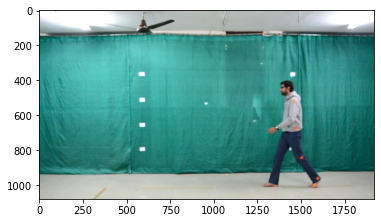

In [ ]:
#to load and read the image
img = wget.download("https://cprakash86.files.wordpress.com/2021/01/s1_1.png")
img=Image.open(img)
plt.imshow(img)

### Task 2. Crop the image to get Area Of Intrest (AOI ) as shown in expected output figure

In [ ]:
image.size

(1920, 1080)

In [ ]:
#cropping the image
left = 400
top = 150
right = 1900
bottom = 1000

img = image.crop((left, top, right, bottom))

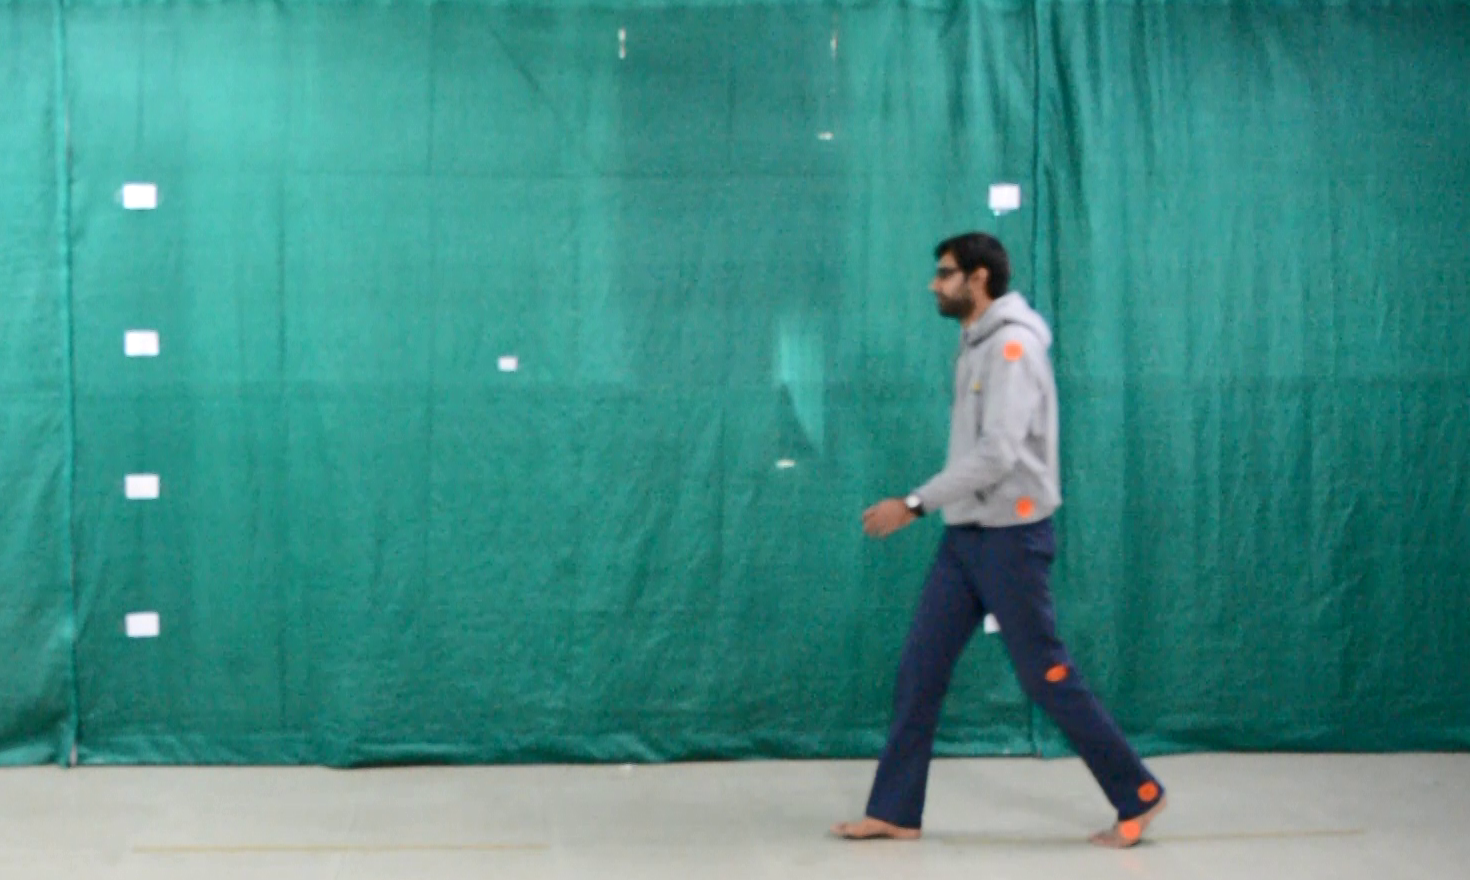

In [ ]:
img

### Task 3.

(a) Convert the image to grayscale

(b) Resize image using PIL and maintain the aspect ratio

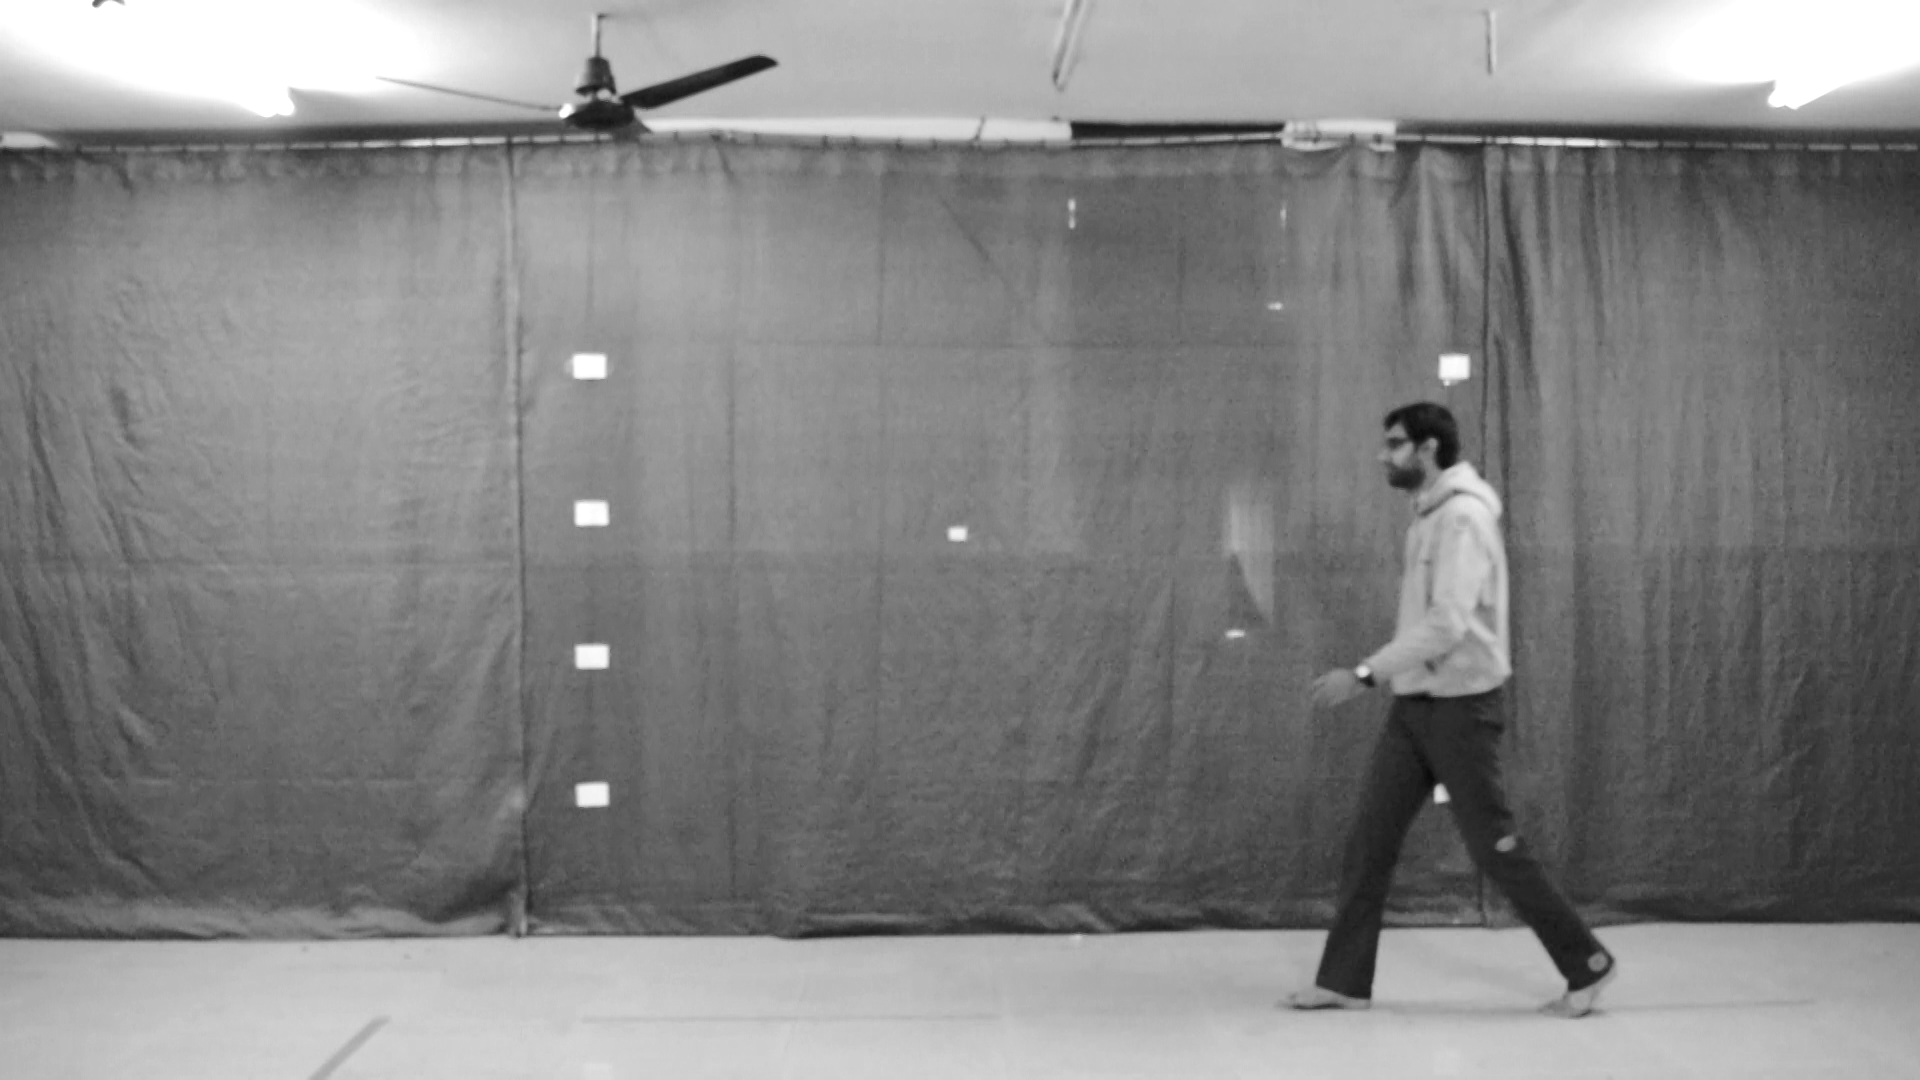

In [ ]:
#converting to grayscale
img1 =  img.convert('L')
img1

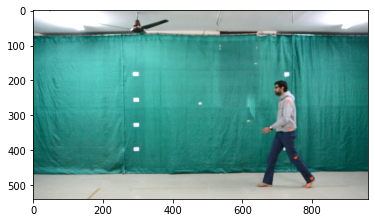

In [ ]:
#To resize the image
h, w = img.size
new_h = int(h/2)
new_w = int(w/2)
img2 = img.resize((new_h, new_w), Image.ANTIALIAS)
plt.imshow(img2)

### Task 4. From the image to extract the red components in the image.
- Doing it in my own method

In [ ]:
%matplotlib inline

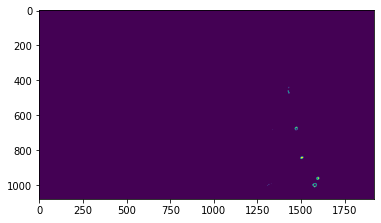

In [ ]:
# Extracting only the red dots from the image and converting to bonary image
import cv2
import numpy as np

img = cv2.imread("s1_1.png")
#Converting image type to HSV format using cvtColor()
hsv = cv2.cvtColor((img) , cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (4, 110, 170), (15, 210, 240))
plt.imshow(mask)

In [ ]:
import imutils

In [ ]:
#Finding the contours in the image
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

[(0, 0),
 (0, 0),
 (1316, 995),
 (0, 0),
 (1580, 999),
 (1597, 961),
 (1505, 843),
 (0, 0),
 (0, 0),
 (0, 0),
 (1473, 674),
 (0, 0),
 (1430, 467),
 (0, 0),
 (0, 0),
 (1430, 441)]

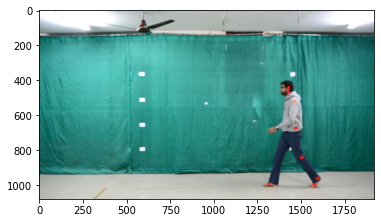

In [ ]:
#The centroids of the contour are being evaluated
centroid = []
for c in cnts:
    M = cv2.moments(c)
    cX = int(M["m10"] / (M["m00"] + 1e-7))
    cY = int(M["m01"] / (M["m00"] + 1e-7))
    centroid.append((cX,cY))
    #radius = 6, colour = red(0, 0, 255, thickness = 3
    img = cv2.circle(img, (cX, cY), 6, (0, 0, 255), 3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cv2.waitKey(0)
centroid

### Task 5. Label all the connected components in the image.

[(0, 0),
 (0, 0),
 (1316, 995),
 (0, 0),
 (1580, 999),
 (1597, 961),
 (1505, 843),
 (0, 0),
 (0, 0),
 (0, 0),
 (1473, 674),
 (0, 0),
 (1430, 467),
 (0, 0),
 (0, 0),
 (1430, 441)]

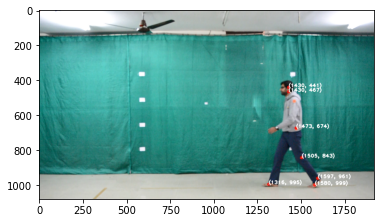

In [ ]:
# Labelling the dots with the coordinates on the image
for c in centroid:
    img = cv2.putText(img, str(c), (c[0], c[1]),cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 4)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
centroid

### Task 6. Loop to bound the red objects in a rectangular box.

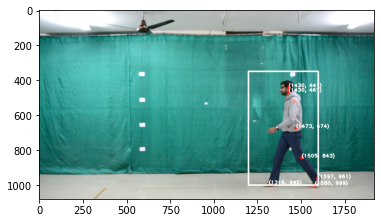

In [ ]:
#A box is applied around all the dots
img = cv2.rectangle(img, (1200, 350), (1600, 1000), (255, 255, 255), 7)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Task 7. To draw line between points

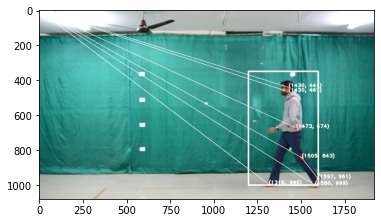

In [ ]:
#A line is drawn between the points
for i in range(1,len(centroid)):
    img = cv2.line(img, centroid[i-1], centroid[i], (255, 255, 255) , 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Your Learning :

Learnt the use of OpenCV for colour scheme of an image.

OpenCV can be used for reshaping the objects.

The experience was rather gruelsome as found it extremely tough and a lot had to be searched on stackoverflow for completing it.